In [24]:
#Importamos librerias
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Libreria de arbol de decisiones
import matplotlib.pyplot as plt

In [25]:
# Cargar el conjunto de datos en un DataFrame
df = pd.read_csv('/content/drive/MyDrive/Practica Diplomado/Entrenamiento de modelos/StressLevelDataset.csv')
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [26]:
#Miramos la cantidad de estudiantes según el rango de estrés
estresEst = df['stress_level'].value_counts()
print("Estudiantes según el rango de estrés:\n",estresEst)

Estudiantes según el rango de estrés:
 0    373
2    369
1    358
Name: stress_level, dtype: int64


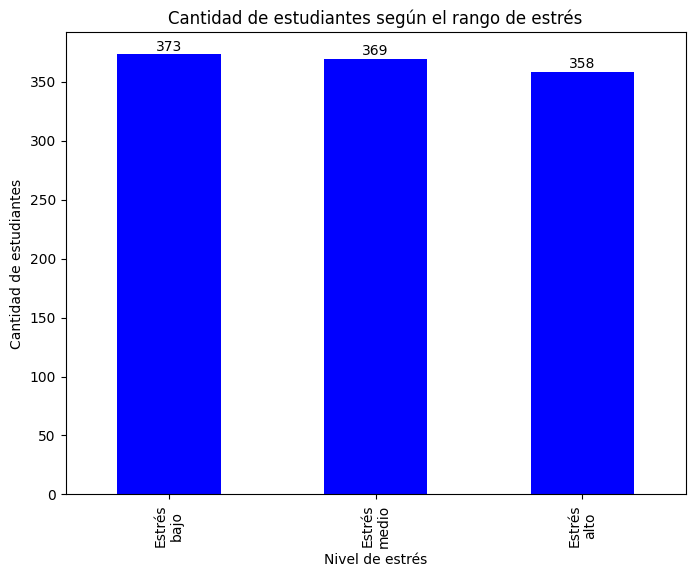

In [27]:
# Crea el gráfico de barras
plt.figure(figsize=(8, 6))
estresEst.plot(kind='bar', color='blue')

# Cambia los rangos del eje x por etiquetas
plt.xticks(ticks=range(len(estresEst.index)), labels=['Estrés\nbajo', 'Estrés\nmedio', 'Estrés\nalto'])

# Añade etiquetas y título
plt.xlabel('Nivel de estrés')
plt.ylabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes según el rango de estrés')

# Añade el número de datos en cada columna
for i, v in enumerate(estresEst):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

# Guarda el gráfico como un archivo PNG
plt.savefig('grafico_estres0.png')

# Muestra el gráfico
plt.show()


In [28]:
#Creamos nuestro vector de variables independientes (caracteristicas)
x = df.drop(['stress_level'],axis = 1)
print("Caracteristicas originales:\n",x)

Caracteristicas originales:
       anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

In [29]:
#Creamos nuestro vector de etiquetas(stress_level)
y = df.stress_level
y

0       1
1       2
2       1
3       2
4       1
       ..
1095    1
1096    2
1097    0
1098    2
1099    2
Name: stress_level, Length: 1100, dtype: int64

In [30]:
#Creamos nuestros sets de entrenamiento
from sklearn.model_selection import train_test_split #Importamos librerias
x_entre, x_test, y_entre, y_test = train_test_split(x, y, test_size=0.3, random_state=2024)
#En este caso vamos a utilizar el 30% de testeo y el 70% para entreno

In [31]:
#Mostramos en pantalla nuestros sets de entrenamiento y testeo
print("Cantidad de datos para Tren de entreno: ", x_entre.shape, y_entre.shape)
print("Cantidad de datos para Tren de testeo: ", x_test.shape, y_test.shape)

Cantidad de datos para Tren de entreno:  (770, 20) (770,)
Cantidad de datos para Tren de testeo:  (330, 20) (330,)


In [32]:
#Empezamos a modelar nuestro arbol de desiciones con un criterio llamado entropia este
#nos entregará la ganancia de información que nos ayudará a mirar si construimos bien nuestro arbol
arbol = DecisionTreeClassifier(criterion="entropy",max_depth=2, random_state= 2024) #número de nodos en el arbol
#declaramos un crterio entropia y que tenga un maximo de ramificaciones o nodos

In [33]:
#Ahora ajustamos nuestro modelo usando los datos de entrenamiento
arbol.fit(x_entre,y_entre)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=2024)

In [34]:
#Empezamos a hacer la predicción y la guardamos en arbolpred
arbolpred = arbol.predict(x_test) #utilizamos valores de testeo

In [35]:
#Comparamos los valores reales con los predichos por el modelo
print("Predicción del modelo: ", arbolpred [0:20])
print("Valores reales:\n", y_test[0:20])

Predicción del modelo:  [0 1 2 0 1 2 2 1 0 0 2 2 2 1 2 1 0 2 2 1]
Valores reales:
 332     0
309     1
1026    1
964     0
977     1
430     2
320     0
531     1
20      0
159     0
828     2
751     0
342     2
81      1
534     0
850     1
559     0
236     2
792     2
350     1
Name: stress_level, dtype: int64


In [36]:
#Evaluamos nuestro modelo y observamos la predicción
from sklearn import metrics
print("Exactitud del Arbol de decisiones: ", metrics.accuracy_score(y_test, arbolpred))

Exactitud del Arbol de decisiones:  0.9


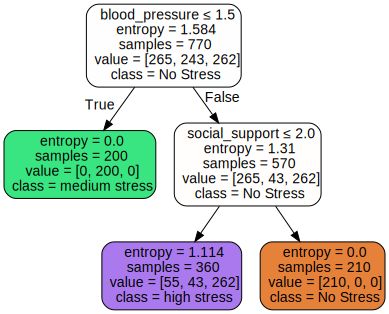

In [37]:
import graphviz

dot_data = tree.export_graphviz(arbol, out_file=None,
                         feature_names=x_entre.columns.values,
                         class_names=['No Stress','medium stress','high stress'],
                         filled=True, rounded=True,
                         special_characters=True,leaves_parallel = False)
graph = graphviz.Source(dot_data)
graph

In [38]:
#Guarda el gráfico como png
graph.render("arbol_decision", format="png", cleanup=True)

'arbol_decision.png'

[Text(0.5, 1.0, 'Matriz de Confusión'),
 Text(0.5, 0, 'Clases predichas'),
 Text(0, 0.5, 'Clases verdaderas')]

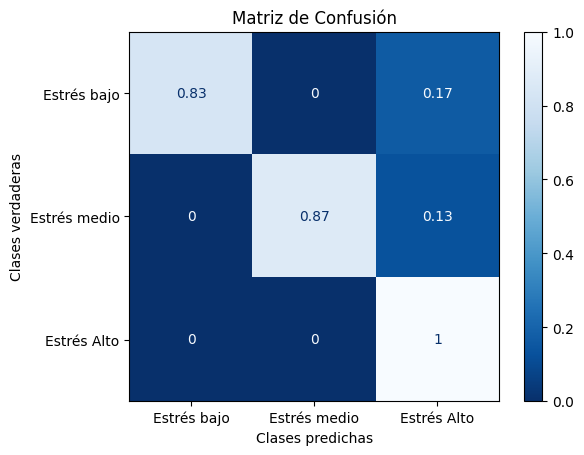

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = arbol.predict(x_test)
cm = confusion_matrix(y_test, y_pred, normalize='true')

cm_display = ConfusionMatrixDisplay(cm, display_labels=['Estrés bajo','Estrés medio','Estrés Alto'])
cm_display.plot(cmap='Blues_r')
cm_display.ax_.set(title='Matriz de Confusión', xlabel='Clases predichas', ylabel='Clases verdaderas')

In [40]:
# Guarda el gráfico como un archivo de imagen
plt.savefig('confusion_matrix.png')

<Figure size 640x480 with 0 Axes>

In [41]:
from sklearn.metrics import precision_recall_fscore_support as score, classification_report

precision, recall, fscore, support = score(y_test, y_pred)

print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall)) ##La que mejor resultado da en este caso
print('F1score: {}'.format(fscore))
print('Support: {}'.format(support))

Precision: [1.         1.         0.76428571]
Recall: [0.83333333 0.86956522 1.        ]
F1score: [0.90909091 0.93023256 0.86639676]
Support: [108 115 107]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       108
           1       1.00      0.87      0.93       115
           2       0.76      1.00      0.87       107

    accuracy                           0.90       330
   macro avg       0.92      0.90      0.90       330
weighted avg       0.92      0.90      0.90       330



In [43]:
import pickle

In [44]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(arbol, file)

In [45]:
# Cargamos el modelo
pkl_filename = "pickle_model1.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'pickle_model1.pkl'